# Tablite

<table><tr>
    <td> <img src="https://app.travis-ci.com/root-11/tablite.svg?branch=master" alt="Build Status" style="width: 100px;"/> </td>
    <td></td>
        <td> <img src="https://codecov.io/gh/root-11/tablite/branch/master/graph/badge.svg" alt="Code coverage" style="width: 100px;"/> </td>
    <td></td>
        <td> <img src="https://pepy.tech/badge/tablite" alt="Downloads" style="width: 100px;"/> </td>
    <td></td>
        <td> <img src="https://pepy.tech/badge/tablite/month" alt="Downloads / month" style="width: 100px;"/> </td>
    <td></td>
</tr></table>


# Introduction

[Tablite](https://pypi.org/project/tablite/) fills the data-science space where incremental data processing based on:

- Datasets are larger than memory.
- You don't want to worry about datatypes.

Tablite thereby competes with:

- Pandas, but saves the memory overhead.
- Numpy, but spares you from worrying about lower level data types
- SQlite, by sheer speed.
- Polars, by working beyond RAM.
- Other libraries for data cleaning thanks to tablites powerful `datatypes` module.

**Install**: `pip install tablite`

**Usage**:  `>>> from tablite import Table`

**Upgrade**: `pip install tablite --no-cache --upgrade`


### Overview

(Version 2023.6.0 and later. For older version see [this](https://github.com/root-11/tablite/blob/9813c34aa5f4c19683686df5e591ee690f0ad2bc/tutorial.ipynb))

- Tablite handles all Python datatypes: `str`, `float`, `bool`, `int`, `date`, `datetime`, `time`, `timedelta` and `None`.
- you can select:
  - all rows in a column as `table['A']`
  - rows across all columns as `table[4:8]`
  - or a slice as `table['A', 'B', slice(4,8) ]`.
- you to update with `table['A'][2] = new value`
- you can store or send data using json, by:
  - dumping to json: `json_str = table.to_json()`, or
  - you can load it with `Table.from_json(json_str)`.
- you can iterate over rows using `for row in Table.rows`.
- you can ask `column_xyz in Table.colums` ?
- load from files with `new_table = Table.from_file('this.csv')` which has automatic datatype detection
- perform inner, outer & left sql join between tables as simple as `table_1.inner_join(table2, keys=['A', 'B'])`
- summarise using `table.groupby( ... )`
- create pivot tables using `groupby.pivot( ... )`
- perform multi-criteria lookup in tables using `table1.lookup(table2, criteria=.....`
- and of course a large selection of tools in `from tablite.tools import *`



### Examples

Here are some examples:

In [1]:
from tablite import Table

# To create a tablite table is as simple as populating a dictionary:
t = Table({'A':[1,2,3], 'B':['a','b','c']})

In [2]:
# In this notebook we can show tables in the HTML style:
t

#,A,B
0,1,a
1,2,b
2,3,c


In [3]:
# or the ascii style:
t.show()

+==+=+=+
|# |A|B|
+--+-+-+
| 0|1|a|
| 1|2|b|
| 2|3|c|
+==+=+=+


In [4]:
# or if you'd like to inspect the table, use:
print(str(t))

Table(2 columns, 3 rows)


In [5]:
# You can also add all columns at once (slower) if you prefer. 
t2 = Table(headers=('A','B'), rows=((1,'a'),(2,'b'),(3,'c')))
assert t==t2

In [6]:
# or load data:
t3 = Table.from_file('tests/data/book1.csv')

# to view any table in the notebook just let jupyter show the table. If you're using the terminal use .show(). 
# Note that show gives either first and last 7 rows or the whole table if it is less than 20 rows.
t3

importing: consolidating 'book1.csv': 100.00%|██████████| [00:01<00:00]


#,a,b,c,d,e,f
0,1,0.060606061,0.090909091,0.121212121,0.151515152,0.181818182
1,2,0.121212121,0.242424242,0.484848485,0.96969697,1.939393939
2,3,0.242424242,0.484848485,0.96969697,1.939393939,3.878787879
3,4,0.484848485,0.96969697,1.939393939,3.878787879,7.757575758
4,5,0.96969697,1.939393939,3.878787879,7.757575758,15.51515152
5,6,1.939393939,3.878787879,7.757575758,15.51515152,31.03030303
6,7,3.878787879,7.757575758,15.51515152,31.03030303,62.06060606
...,...,...,...,...,...,...
38,39,16659267088.0,33318534175.0,66637068350.0,133274000000.0,266548000000.0
39,40,33318534175.0,66637068350.0,133274000000.0,266548000000.0,533097000000.0


In [7]:
# should you however want to select the headers instead of importing everything
# (which maybe timeconsuming), simply use get_headers(path)
from tablite.tools import get_headers
from pathlib import Path
path = Path('tests/data/book1.csv')
sample = get_headers(path, linecount=5)
print(f"sample is of type {type(sample)} and has the following entries:")
for k,v in sample.items():
    print(k)
    if isinstance(v,list):
        for r in sample[k]:
            print("\t", r)

sample is of type <class 'dict'> and has the following entries:
delimiter
book1.csv
	 ['a', 'b', 'c', 'd', 'e', 'f']
	 ['1', '0.060606061', '0.090909091', '0.121212121', '0.151515152', '0.181818182']
	 ['2', '0.121212121', '0.242424242', '0.484848485', '0.96969697', '1.939393939']
	 ['3', '0.242424242', '0.484848485', '0.96969697', '1.939393939', '3.878787879']
	 ['4', '0.484848485', '0.96969697', '1.939393939', '3.878787879', '7.757575758']
	 ['5', '0.96969697', '1.939393939', '3.878787879', '7.757575758', '15.51515152']
	 ['6', '1.939393939', '3.878787879', '7.757575758', '15.51515152', '31.03030303']


In [8]:
# to extend a table by adding columns, use t[new] = [new values]
t['C'] = [4,5,6]
# but make sure the column has the same length as the rest of the table!
t

#,A,B,C
0,1,a,4
1,2,b,5
2,3,c,6


In [9]:
# should you want to mix datatypes, tablite will not complain:
from datetime import datetime, date,time,timedelta
import numpy as np
# What you put in ...
t4 = Table()
t4['mixed'] = [
    -1,0,1,  # regular integers
    -12345678909876543211234567890987654321,  # very very large integer
    None,np.nan,  # null values 
    "one", "",  # strings
    True,False,  # booleans
    float('inf'), 0.01,  # floats
    date(2000,1,1),   # date
    datetime(2002,2,3,23,0,4,6660),  # datetime
    time(12,12,12),  # time
    timedelta(days=3, seconds=5678)  # timedelta
]
# ... is exactly what you get out:
t4

#,mixed
0,-1
1,0
2,1
3,-12345678909876543211234567890987654321
4,None
5,nan
6,one
7,
8,True
9,False


In [10]:
# also if you claim the values back as a python list:
for item in list(t4['mixed']):
    print(item)

-1
0
1
-12345678909876543211234567890987654321
None
nan
one

True
False
inf
0.01
2000-01-01
2002-02-03 23:00:04.006660
12:12:12
3 days, 1:34:38


The column itself (`__repr__`) shows us the `pid`, `file location` and the entries, so you know exactly what you're working with.

In [11]:
t4['mixed']

Column(C:\Users\madsenbj\AppData\Local\Temp\tablite-tmp\pid-2860, [-1 0 1 -12345678909876543211234567890987654321 None nan 'one' '' True
 False inf 0.01 datetime.date(2000, 1, 1)
 datetime.datetime(2002, 2, 3, 23, 0, 4, 6660) datetime.time(12, 12, 12)
 datetime.timedelta(days=3, seconds=5678)])

In [12]:
# to view the datatypes in a column, use Column.types()
type_dict = t4['mixed'].types()
for k,v in type_dict.items():
    print(k,v)

<class 'int'> 4
<class 'NoneType'> 1
<class 'float'> 3
<class 'str'> 2
<class 'bool'> 2
<class 'datetime.date'> 1
<class 'datetime.datetime'> 1
<class 'datetime.time'> 1
<class 'datetime.timedelta'> 1


In [13]:
# You may have noticed that all datatypes in t3 where identified as floats, despite their origin from a text type file.
# This is because tablite guesses the most probable datatype using the `.guess` function on each column.
# You can use the .guess function like this:
from tablite import DataTypes
t3['a'] = DataTypes.guess(t3['a'])
# You can also convert the datatype using a list comprehension
t3['b'] = [float(v) for v in t3['b']]
t3

#,a,b,c,d,e,f
0,1,0.060606061,0.090909091,0.121212121,0.151515152,0.181818182
1,2,0.121212121,0.242424242,0.484848485,0.96969697,1.939393939
2,3,0.242424242,0.484848485,0.96969697,1.939393939,3.878787879
3,4,0.484848485,0.96969697,1.939393939,3.878787879,7.757575758
4,5,0.96969697,1.939393939,3.878787879,7.757575758,15.51515152
5,6,1.939393939,3.878787879,7.757575758,15.51515152,31.03030303
6,7,3.878787879,7.757575758,15.51515152,31.03030303,62.06060606
...,...,...,...,...,...,...
38,39,16659267088.0,33318534175.0,66637068350.0,133274000000.0,266548000000.0
39,40,33318534175.0,66637068350.0,133274000000.0,266548000000.0,533097000000.0


# API Examples

In the following sections, example are given of the Tablite API's power features:

- Iteration
- Append
- Sort
- Filter
- Index
- Search All 
- Search Any
- Lookup
- Join inner, outer, 
- GroupBy
- Pivot table


# ITERATION!

**_Iteration_** supports for loops and list comprehension at the speed of light:

Just use `[r for r in table.rows]`, or:

    for row in table.rows:
        row ...

Here's a more practical use case:

(1) Imagine a table with columns a,b,c,d,e (all integers) like this:

In [14]:
t = Table()
for column_name in 'abcde':
    t[column_name] =[i for i in range(5)]

(2) we want to add two new columns using the functions:

In [15]:
def f1(a,b,c):
    return a+b+c+1
def f2(b,c,d):
    return b*c*d

(3) and we want to compute two new columns `f` and `g`:

In [16]:
t.add_columns('f', 'g')

(4) we can now use the filter, to iterate over the table, and add the values to the two new columns:

In [17]:
f,g=[],[]
for row in t['a', 'b', 'c', 'd'].rows:
    a, b, c, d = row

    f.append(f1(a, b, c))
    g.append(f2(b, c, d))
t['f'] = f
t['g'] = g

assert len(t) == 5
assert list(t.columns) == list('abcdefg')
t

#,a,b,c,d,e,f,g
0,0,0,0,0,0,1,0
1,1,1,1,1,1,4,1
2,2,2,2,2,2,7,8
3,3,3,3,3,3,10,27
4,4,4,4,4,4,13,64


Take note that if your dataset is assymmetric, a warning will be show:

In [18]:
assymmetric_table = Table({'a':[1,2,3], 'b':[1,2]})
for row in assymmetric_table.rows:
    print(row)
# warning at the bottom ---v

[1, 1]
[2, 2]
[3, None]


d:\github\tablite\tablite\base.py:1131: UserWarning: Column b has length 2 / 3. None will appear as fill value.
  warnings.warn(f"Column {name} has length {len(column)} / {n_max}. None will appear as fill value.")


### Create Index / Indices


**_Index_** supports multi-key indexing using args such as: `index = table.index('B','C')`.

Here's an example:

In [19]:
table7 = Table(columns={
'A': [1,1,2,2,3,4],
'B': [1,1,2,2,30,40],
'C': [-1,-2,-3,-4,-5,-6]
})
index = table7.index('A', 'B')
for k, v in index.items():
    print("key", k, "indices", v)

key (1, 1) indices [0, 1]
key (2, 2) indices [2, 3]
key (3, 30) indices [4]
key (4, 40) indices [5]


The keys are created for each unique column-key-pair, and the value is the index where the key is found. To fetch all rows for key `(2,2)`, we can use:


In [20]:
for ix, row in enumerate(table7.rows):
    if ix in index[(2,2)]:
        print(row)

[2, 2, -3]
[2, 2, -4]


# APPEND

In [21]:
# to append one table to another, use + or += 
print('length before:', len(t3))  # length before: 45
t5 = t3 + t3  
print('length after +', len(t5))  # length after + 90
t5 += t3 
print('length after +=', len(t5))  # length after += 135
# if you need a lot of numbers for a test, you can repeat a table using * and *=
t5 *= 1_000
print('length after +=', len(t5))  # length after += 135000

length before: 45
length after + 90
length after += 135
length after += 135000


In [22]:
t5  

#,a,b,c,d,e,f
0,1,0.060606061,0.090909091,0.121212121,0.151515152,0.181818182
1,2,0.121212121,0.242424242,0.484848485,0.96969697,1.939393939
2,3,0.242424242,0.484848485,0.96969697,1.939393939,3.878787879
3,4,0.484848485,0.96969697,1.939393939,3.878787879,7.757575758
4,5,0.96969697,1.939393939,3.878787879,7.757575758,15.51515152
5,6,1.939393939,3.878787879,7.757575758,15.51515152,31.03030303
6,7,3.878787879,7.757575758,15.51515152,31.03030303,62.06060606
...,...,...,...,...,...,...
"134,993",39,16659267088.0,33318534175.0,66637068350.0,133274000000.0,266548000000.0
"134,994",40,33318534175.0,66637068350.0,133274000000.0,266548000000.0,533097000000.0


In [23]:
# if your are in doubt whether your tables will be the same you can use .stack(other)
assert t.columns != t2.columns  # compares list of column names.
t6 = t.stack(t2)
t6

#,a,b,c,d,e,f,g,A,B
0,0,0,0,0,0,1,0,None,None
1,1,1,1,1,1,4,1,None,None
2,2,2,2,2,2,7,8,None,None
3,3,3,3,3,3,10,27,None,None
4,4,4,4,4,4,13,64,None,None
5,None,None,None,None,None,None,None,1,a
6,None,None,None,None,None,None,None,2,b
7,None,None,None,None,None,None,None,3,c


In [24]:
# As you can see above, t6['C'] is padded with "None" where t2 was missing the columns.

# if you need a more detailed view of the columns you can iterate:
for name in t.columns:
    col_from_t = t[name]
    if name in t2.columns:
        col_from_t2 = t2[name]
        print(name, col_from_t == col_from_t2)
    else:
        print(name, "not in t2")

a not in t2
b not in t2
c not in t2
d not in t2
e not in t2
f not in t2
g not in t2


In [25]:
# to make a copy of a table, use table.copy()
t3_copy = t3.copy()

# you can also perform multi criteria selections using getitem [ ... ]
t3_slice = t3['a','b','d', 5:25:5]
t3_slice

#,a,b,d
0,6,1.939393939,7.757575758
1,11,62.06060606,248.2424242
2,16,1985.939394,7943.757576
3,21,63550.06061,254200.2424


In [26]:
#deleting items also works the same way:
del t3_slice[1:3]  # delete row number 2 & 3 
t3_slice

#,a,b,d
0,6,1.939393939,7.757575758
1,21,63550.06061,254200.2424


In [27]:
# to wipe a table, use .clear:
t3_slice.clear()
t3_slice

Table(0 columns, 0 rows)

# SAVE

In [28]:
# tablite uses .npy for storage because it is fast.
# this means you can make a table persistent using .save
local_file = Path("local_file.tpz")
t5.save(local_file)

old_t5 = Table.load(local_file)
print("the t5 table had", len(old_t5), "rows")  # the t5 table had 135000 rows

del old_t5  # only removes the in-memory object

print("old_t5 still exists?", local_file.exists())
print("path:", local_file)

import os
os.remove(local_file)

loading 'local_file.tpz' file: 100%|██████████| 18000/18000 [00:14<00:00, 1229.63it/s]


the t5 table had 135000 rows
old_t5 still exists? True
path: local_file.tpz


If you want to save a table from one session to another use `save=True`. This tells the garbage collector to leave the tablite Table on disk, so you can load it again without changing your code. 

For example:

First time you run `t = Table.import_file(....big.csv)` it may take a minute or two. 

If you then add `t.save=True` and restart python, the second time you run  `t = Table.import_file(....big.csv)` it will take a few milliseconds instead of minutes.

# FILTER!

In [29]:
unfiltered = Table({'a':[1,2,3,4], 'b':[10,20,30,40]})

In [30]:
true,false = unfiltered.filter(
    [
        {"column1": 'a', "criteria":">=", 'value2':3}
    ], filter_type='all'
)

In [31]:
true

#,a,b
0,3,30
1,4,40


In [32]:
false.show()  # using show here to show that terminal users can have a nice view too.

+==+=+==+
|# |a|b |
+--+-+--+
| 0|1|10|
| 1|2|20|
+==+=+==+


# Any! All?

Any and All are cousins of the filter. They're there so you can use them in the same way as you'd use `any` and `all` in python - as boolean evaluators:

In [33]:
ty = Table({'a':[1,2,3,4],'b': [10,20,30,40]})

In [34]:
# typical python
any(i > 3 for i in ty['a'])

True

In [35]:
# hereby you can do:
any( ty.any(**{'a':lambda x:x>3}).rows )

True

In [36]:
# if you have multiple criteria this also works:
all( ty.all(**{'a': lambda x:x>=2, 'b': lambda x:x<=30}).rows )

True

In [37]:
# or this if you want to see the table.
ty.all(a=lambda x:x>2, b=lambda x:x<=30)

#,a,b
0,3,30


In [38]:
# As `all` and `any` returns tables, this also means that you can chain operations:
ty.any(a=lambda x:x>2).any(b=30)

#,a,b
0,3,30


# SORT!

In [39]:
table = Table({
    'A':[ 1, None, 8, 3, 4, 6,  5,  7,  9],
    'B':[10,'100', 1, 1, 1, 1, 10, 10, 10],
    'C':[ 0,    1, 0, 1, 0, 1,  0,  1,  0],
})
table

#,A,B,C
0,1,10,0
1,None,100,1
2,8,1,0
3,3,1,1
4,4,1,0
5,6,1,1
6,5,10,0
7,7,10,1
8,9,10,0


In [40]:
sort_order = {'B': False, 'C': False, 'A': False}
assert not table.is_sorted(mapping=sort_order)

sorted_table = table.sort(mapping=sort_order)
sorted_table

join: 100%|██████████| 3/3 [00:00<00:00, 601.22it/s]


Sort is reasonable effective as it uses multiprocessing above a million fields.


Hint: You can set this limit in `tablite.config`, like this:

In [41]:
from tablite.config import Config
print(f"multiprocessing is used above {Config.SINGLE_PROCESSING_LIMIT:,} fields")

multiprocessing is used above 1,000,000 fields


In [42]:
import math
n = math.ceil(1_000_000 / (9*3))

table = Table({
    'A':[ 1, None, 8, 3, 4, 6,  5,  7,  9]*n,
    'B':[10,'100', 1, 1, 1, 1, 10, 10, 10]*n,
    'C':[ 0,    1, 0, 1, 0, 1,  0,  1,  0]*n,
})
table

#,A,B,C
0,1,10,0
1,None,100,1
2,8,1,0
3,3,1,1
4,4,1,0
5,6,1,1
6,5,10,0
...,...,...,...
"333,335",8,1,0
"333,336",3,1,1


In [43]:
import time as cputime
start = cputime.time()
sort_order = {'B': False, 'C': False, 'A': False}
sorted_table = table.sort(mapping=sort_order)  # sorts 1M values.
print("table sorting took ", round(cputime.time() - start,3), "secs")
sorted_table

creating sort index:   0%|          | 0/3 [00:00<?, ?it/s]

join: 100%|██████████| 3/3 [00:00<00:00, 15.20it/s]

table sorting took  0.958 secs


# GROUPBY !

In [44]:
n = math.ceil(1_000_000 / (9*3))

table = Table({
    'A':[ 1, None, 8, 3, 4, 6,  5,  7,  9]*n,
    'B':[10,'100', 1, 1, 1, 1, 10, 10, 10]*n,
    'C':[ 0,    1, 0, 1, 0, 1,  0,  1,  0]*n,
})
table


#,A,B,C
0,1,10,0
1,None,100,1
2,8,1,0
3,3,1,1
4,4,1,0
5,6,1,1
6,5,10,0
...,...,...,...
"333,335",8,1,0
"333,336",3,1,1


In [45]:
from tablite import GroupBy as gb
grpby = table.groupby(keys=['C', 'B'], functions=[('A', gb.count)])
grpby

groupby: 100%|██████████| 333342/333342 [00:00<00:00, 359979.77it/s]


#,C,B,Count(A)
0,0,10,111114
1,1,100,37038
2,0,1,74076
3,1,1,74076
4,1,10,37038


Here is the list of groupby functions:

```
class GroupBy(object):    
    max = Max  # shortcuts to avoid having to type a long list of imports.
    min = Min
    sum = Sum
    product = Product
    first = First
    last = Last
    count = Count
    count_unique = CountUnique
    avg = Average
    stdev = StandardDeviation
    median = Median
    mode = Mode
```

### Did I say pivot table? Yes.


**Pivot Table** is included in the groupby functionality - so yes - you can pivot the groupby on any column that is used for grouping. Here's a simple example:


In [46]:
t = Table({
    'A':[1, 1, 2, 2, 3, 3] * 2,
    'B':[1, 2, 3, 4, 5, 6] * 2,
    'C':[6, 5, 4, 3, 2, 1] * 2,
})
t

#,A,B,C
0,1,1,6
1,1,2,5
2,2,3,4
3,2,4,3
4,3,5,2
5,3,6,1
6,1,1,6
7,1,2,5
8,2,3,4
9,2,4,3


In [47]:
t2 = t.pivot(rows=['C'], columns=['A'], functions=[('B', gb.sum), ('B', gb.count)], values_as_rows=False)
t2

pivot: 100%|██████████| 14/14 [00:00<00:00, 1170.57it/s]


#,C,"Sum(B,A=1)","Count(B,A=1)","Sum(B,A=2)","Count(B,A=2)","Sum(B,A=3)","Count(B,A=3)"
0,6,2,2,None,None,None,None
1,5,4,2,None,None,None,None
2,4,None,None,6,2,None,None
3,3,None,None,8,2,None,None
4,2,None,None,None,None,10,2
5,1,None,None,None,None,12,2


# JOIN!

In [48]:
numbers = Table()
numbers.add_column('number', data=[      1,      2,       3,       4,   None])
numbers.add_column('colour', data=['black', 'blue', 'white', 'white', 'blue'])

letters = Table()
letters.add_column('letter', data=[  'a',     'b',      'c',     'd',   None])
letters.add_column('color', data=['blue', 'white', 'orange', 'white', 'blue'])


In [49]:
# left join
# SELECT number, letter FROM numbers LEFT JOIN letters ON numbers.colour == letters.color
left_join = numbers.left_join(letters, left_keys=['colour'], right_keys=['color'], left_columns=['number'], right_columns=['letter'])
left_join

join: 100%|██████████| 2/2 [00:00<00:00, 668.84it/s]


#,number,letter
0,1,None
1,2,a
2,2,None
3,None,a
4,None,None
5,3,b
6,3,d
7,4,b
8,4,d


In [50]:
# inner join
# SELECT number, letter FROM numbers JOIN letters ON numbers.colour == letters.color
inner_join = numbers.inner_join(letters, left_keys=['colour'], right_keys=['color'], left_columns=['number'], right_columns=['letter'])
inner_join

join: 100%|██████████| 2/2 [00:00<00:00, 669.11it/s]


#,number,letter
0,2,a
1,2,None
2,None,a
3,None,None
4,3,b
5,3,d
6,4,b
7,4,d


In [51]:
 # outer join
# SELECT number, letter FROM numbers OUTER JOIN letters ON numbers.colour == letters.color
outer_join = numbers.outer_join(letters, left_keys=['colour'], right_keys=['color'], left_columns=['number'], right_columns=['letter'])
outer_join

join: 100%|██████████| 2/2 [00:00<00:00, 501.71it/s]


#,number,letter
0,1,None
1,2,a
2,2,None
3,None,a
4,None,None
5,3,b
6,3,d
7,4,b
8,4,d
9,None,c


**Q: But ...I think there's a bug in the join...**  
**A: Venn diagrams do not explain joins**.
> A Venn diagram is a widely-used diagram style that shows the logical relation between sets, popularised by John Venn in the 1880s. The diagrams are used to teach elementary set theory, and to illustrate simple set relationships<br>[source: en.wikipedia.org](https://en.wikipedia.org/wiki/Venn_diagram)

Joins operate over rows and ***when*** there are **duplicate rows**, these will be replicated in the output.
Many beginners are surprised by this, because they didn't read the SQL standard.

**Q: So what do I do?**  
**A**: If you want to get rid of duplicates using tablite, use the `index` functionality
across all columns and pick the first row from each index. Here's the recipe that starts with plenty of duplicates:

In [52]:
old_table = Table({
'A':[1,1,1,2,2,2,3,3,3],
'B':[1,1,4,2,2,5,3,3,6],
})
old_table

#,A,B
0,1,1
1,1,1
2,1,4
3,2,2
4,2,2
5,2,5
6,3,3
7,3,3
8,3,6


In [53]:
# CREATE TABLE OF UNIQUE ENTRIES (a.k.a. DEDUPLICATE)
new_table = old_table.drop_duplicates()
new_table

9it [00:00, 4510.00it/s]
join: 100%|██████████| 2/2 [00:00<00:00, 668.84it/s]


#,A,B
0,1,1
1,1,4
2,2,2
3,2,5
4,3,3
5,3,6


You can also use groupby; We'll get to that in a minute.

# LOOKUP!

Lookup is a special case of a search loop: Say for example you are planning a concert and want to make sure that your friends can make it home using public transport: You would have to find the first departure after the concert ends towards their home. A join would only give you a direct match on the time.

Lookup allows you "to iterate through a list of data and find the first match given a set of criteria."

Here's an example:

First we have our list of friends and their stops.

In [54]:
friends = Table({
"name":['Alice', 'Betty', 'Charlie', 'Dorethy', 'Edward', 'Fred'],
"stop":['Downtown-1', 'Downtown-2', 'Hillside View', 'Hillside Crescent', 'Downtown-2', 'Chicago'],
})
friends

#,name,stop
0,Alice,Downtown-1
1,Betty,Downtown-2
2,Charlie,Hillside View
3,Dorethy,Hillside Crescent
4,Edward,Downtown-2
5,Fred,Chicago


Next we need a list of bus routes and their time and stops. I don't have that, so I'm making one up:

In [55]:

import random
random.seed(11)
table_size = 40

times = [DataTypes.time(random.randint(21, 23), random.randint(0, 59)) for i in range(table_size)]
stops = ['Stadium', 'Hillside', 'Hillside View', 'Hillside Crescent', 'Downtown-1', 'Downtown-2',
            'Central station'] * 2 + [f'Random Road-{i}' for i in range(table_size)]
route = [random.choice([1, 2, 3]) for i in stops]


In [56]:

bus_table = Table({
"time":times,
"stop":stops[:table_size],
"route":route[:table_size],
})
bus_table.sort(mapping={'time': False})

print("Departures from Concert Hall towards ...")
bus_table[0:10]


join: 100%|██████████| 3/3 [00:00<00:00, 752.48it/s]

Departures from Concert Hall towards ...


#,time,stop,route
0,21:02:00,Random Road-6,2
1,21:05:00,Hillside Crescent,2
2,21:06:00,Hillside,1
3,21:25:00,Random Road-24,1
4,21:29:00,Random Road-16,1
5,21:32:00,Random Road-21,1
6,21:33:00,Random Road-12,1
7,21:36:00,Random Road-23,3
8,21:38:00,Central station,2
9,21:38:00,Random Road-8,2


Let's say the concerts ends at 21:00 and it takes a 10 minutes to get to the bus-stop. Earliest departure must then be 21:10 - goodbye hugs included.

In [57]:
lookup_1 = friends.lookup(bus_table, (DataTypes.time(21, 10), "<=", 'time'), ('stop', "==", 'stop'))
lookup1_sorted = lookup_1.sorted(mapping={'time': False, 'name':False}, sort_mode='unix')
lookup1_sorted

join: 100%|██████████| 5/5 [00:00<00:00, 629.53it/s]


#,name,stop,time,stop_1,route
0,Fred,Chicago,None,None,None
1,Betty,Downtown-2,21:51:00,Downtown-2,1
2,Edward,Downtown-2,21:51:00,Downtown-2,1
3,Charlie,Hillside View,22:19:00,Hillside View,2
4,Alice,Downtown-1,23:12:00,Downtown-1,3
5,Dorethy,Hillside Crescent,23:54:00,Hillside Crescent,1


Lookup's ability to custom criteria is thereby far more versatile than SQL joins. 

But _with great power comes great responsibility_.

### Are there other ways I can add data?

Yes - but row based operations cause a lot of IO, so it'll work but be slower:

In [58]:
from tablite import Table
t = Table()  # create table
t.add_columns('row','A','B','C')  # add columns

The following examples are all valid and append the row (1,2,3) to the table.

In [59]:
t.add_rows(1, 1, 2, 3)  # individual values
t.add_rows([2, 1, 2, 3])  # list of values
t.add_rows((3, 1, 2, 3))  # tuple of values
t.add_rows(*(4, 1, 2, 3))  # unpacked tuple
t.add_rows(row=5, A=1, B=2, C=3)   # keyword - args
t.add_rows(**{'row': 6, 'A': 1, 'B': 2, 'C': 3})  # dict / json.

The following examples add two rows to the table

In [60]:
t.add_rows((7, 1, 2, 3), (8, 4, 5, 6))  # two (or more) tuples.
t.add_rows([9, 1, 2, 3], [10, 4, 5, 6])  # two or more lists
t.add_rows({'row': 11, 'A': 1, 'B': 2, 'C': 3},
          {'row': 12, 'A': 4, 'B': 5, 'C': 6})  # two (or more) dicts as args.
t.add_rows(*[{'row': 13, 'A': 1, 'B': 2, 'C': 3},
            {'row': 14, 'A': 1, 'B': 2, 'C': 3}])  # list of dicts.

In [61]:
t

#,row,A,B,C
0,1,1,2,3
1,2,1,2,3
2,3,1,2,3
3,4,1,2,3
4,5,1,2,3
5,6,1,2,3
6,7,1,2,3
7,8,4,5,6
8,9,1,2,3
9,10,4,5,6


As the row incremented from `1` in the first of these examples, and finished with
`row: 14`, you can now see the whole table above

### Okay, great. How do I load data?

Easy. Use `file_reader`. Here's an example:

In [62]:
from pathlib import Path
path = Path('tests/data/book1.csv')
tx = Table.from_file(path)
tx


importing: consolidating 'book1.csv': 100.00%|██████████| [00:01<00:00]


#,a,b,c,d,e,f
0,1,0.060606061,0.090909091,0.121212121,0.151515152,0.181818182
1,2,0.121212121,0.242424242,0.484848485,0.96969697,1.939393939
2,3,0.242424242,0.484848485,0.96969697,1.939393939,3.878787879
3,4,0.484848485,0.96969697,1.939393939,3.878787879,7.757575758
4,5,0.96969697,1.939393939,3.878787879,7.757575758,15.51515152
5,6,1.939393939,3.878787879,7.757575758,15.51515152,31.03030303
6,7,3.878787879,7.757575758,15.51515152,31.03030303,62.06060606
...,...,...,...,...,...,...
38,39,16659267088.0,33318534175.0,66637068350.0,133274000000.0,266548000000.0
39,40,33318534175.0,66637068350.0,133274000000.0,266548000000.0,533097000000.0


Note that you can also add start, limit and chunk_size to the file reader. Here's an example:

In [63]:
path = Path('tests/data/book1.csv')
tx2 = Table.from_file(path, start=2, limit=15)
tx2

importing: consolidating 'book1.csv': 100.00%|██████████| [00:01<00:00]


#,a,b,c,d,e,f
0,1,0.060606061,0.090909091,0.121212121,0.151515152,0.181818182
1,2,0.121212121,0.242424242,0.484848485,0.96969697,1.939393939
2,3,0.242424242,0.484848485,0.96969697,1.939393939,3.878787879
3,4,0.484848485,0.96969697,1.939393939,3.878787879,7.757575758
4,5,0.96969697,1.939393939,3.878787879,7.757575758,15.51515152
5,6,1.939393939,3.878787879,7.757575758,15.51515152,31.03030303
6,7,3.878787879,7.757575758,15.51515152,31.03030303,62.06060606
...,...,...,...,...,...,...
38,39,16659267088.0,33318534175.0,66637068350.0,133274000000.0,266548000000.0
39,40,33318534175.0,66637068350.0,133274000000.0,266548000000.0,533097000000.0


**How good is the file_reader?**

I've included all formats in the test suite that are publicly available from the [Alan Turing institute](https://github.com/alan-turing-institute), [dateutils](https://github.com/dateutil/dateutil)) and Python's [csv reader](https://github.com/python/cpython/blob/master/Lib/csv.py).

What about `MM-DD-YYYY` formats? Some users from the US ask why the csv reader doesn't read the month-day-year format.

The answer is simple: It's not an [iso8601](https://en.wikipedia.org/wiki/ISO_8601) format. The US month-day-year format is a **locale** that may be used a lot in the US, but it isn't an international standard. 

If you need to work with `MM-DD-YYYY` you will find that the file_reader will import the values as text (str). You can then reformat it with a custom function like:

In [64]:
s = "03-21-1998"
from datetime import date
f = lambda s: date(int(s[-4:]), int(s[:2]), int(s[3:5]))
f(s)

datetime.date(1998, 3, 21)

### Sweet. What formats are supported? Can I add my own file reader?

Yes! This is very good for special log files or custom json formats.
Here's how you do it:

(1) Go to all existing readers in the `tablite.core` and find the closest match.

In [65]:
from tablite.import_utils import file_readers
for k,v in file_readers.items():
    print(k,v)

fods <function excel_reader at 0x0000010E7F1F9B40>
json <function excel_reader at 0x0000010E7F1F9B40>
html <function from_html at 0x0000010E7F1F9AB0>
hdf5 <function from_hdf5 at 0x0000010E7EAC0DC0>
simple <function excel_reader at 0x0000010E7F1F9B40>
rst <function excel_reader at 0x0000010E7F1F9B40>
mediawiki <function excel_reader at 0x0000010E7F1F9B40>
xlsx <function excel_reader at 0x0000010E7F1F9B40>
xls <function excel_reader at 0x0000010E7F1F9B40>
xlsm <function excel_reader at 0x0000010E7F1F9B40>
csv <function text_reader at 0x0000010E7F1F9EA0>
tsv <function text_reader at 0x0000010E7F1F9EA0>
txt <function text_reader at 0x0000010E7F1F9EA0>
ods <function ods_reader at 0x0000010E7F1F9BD0>


(2) define your new file reader

In [66]:
def my_magic_reader(path, **kwargs):   # define your new file reader.
    print("do magic with {path}")
    return

(3) add it to the list of readers.

In [67]:
file_readers['my_special_format'] = my_magic_reader

The `file_readers` are all in [tablite.core](https://github.com/root-11/tablite/blob/master/tablite/core.py) so if you intend to extend the readers, I recommend that you start here.

### Very nice. How about exporting data?

Just use .export

In [68]:
file = Path('example.xlsx')
tx2.to_xlsx(file)
os.remove(file)

![example.xlsx](https://github.com/root-11/tablite/blob/master/images/example_xlsx_exported.png?raw=true)

### Cool. Does it play well with plotting packages?

Yes. Here's an example you can copy and paste:

In [69]:
from tablite import Table

t = Table({
'a':[1, 2, 8, 3, 4, 6, 5, 7, 9],
'b':[10, 100, 3, 4, 16, -1, 10, 10, 10],
})
t.sort(mapping={"a":False})
t

join: 100%|██████████| 2/2 [00:00<00:00, 668.84it/s]


#,a,b
0,1,10
1,2,100
2,3,4
3,4,16
4,5,10
5,6,-1
6,7,10
7,8,3
8,9,10


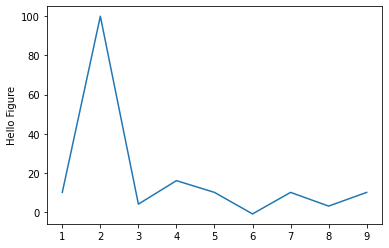

In [70]:
import matplotlib.pyplot as plt
plt.plot(t['a'], t['b'])
plt.ylabel('Hello Figure')
plt.show()

# I like sql. Can tablite understand SQL?

Almost. You can use `table.to_sql` and tablite will return ANSI-92 compliant SQL.

You can also create a table using `Table.from_sql` and tablite will consume ANSI-92 compliant SQL.

### But what do I do if I'm about to run out of memory?

You wont. Every tablite table is backed by disk. The memory footprint of a table is only the metadata required to know the relationships between variable names and the datastructures.

Let's do a comparison:

In [71]:
# Let's monitor the memory and record the observations into a table!
import psutil, os, gc
from time import process_time, sleep
process = psutil.Process(os.getpid())
baseline_memory = process.memory_info().rss

digits = 1_000_000

records = Table()
records.add_column('method')
records.add_column('memory')
records.add_column('time')

# Let's now use the common and convenient "row" based format:


In [72]:

start = process_time()
L = []
for _ in range(digits):
    L.append(tuple([11 for _ in range(10)]))
end = process_time()
# go and check taskmanagers memory usage.
# At this point we're using ~154.2 Mb to store 1 million lists with 10 items.
records.add_rows(('1e6 lists w. 10 integers', process.memory_info().rss - baseline_memory, round(end-start,4)))

L.clear()
gc.collect()
sleep(1)


In [73]:

# Let's now use a columnar format instead:
start = process_time()
L = [[11 for i in range(digits)] for _ in range(10)]
end = process_time()

# go and check taskmanagers memory usage.
# at this point we're using ~98.2 Mb to store 10 lists with 1 million items.
records.add_rows(('10 lists with 1e6 integers', process.memory_info().rss - baseline_memory, round(end-start,4)))
L.clear()
gc.collect()
sleep(1)


In [74]:

# We've thereby saved 50 Mb by avoiding the overhead from managing 1 million lists.

# Q: But why didn't I just use an array? It would have even lower memory footprint.
# A: First, array's don't handle None's and we get that frequently in dirty csv data.
# Second, Table needs even less memory.

# Let's start with an array:

import array
start = process_time()
L = [array.array('i', [11 for _ in range(digits)]) for _ in range(10)]
end = process_time()
# go and check taskmanagers memory usage.
# at this point we're using 60.0 Mb to store 10 lists with 1 million integers.

records.add_rows(('10 lists with 1e6 integers in arrays', process.memory_info().rss - baseline_memory, round(end-start,4)))
L.clear()
gc.collect()
sleep(1)


In [75]:

# Now let's use Table:

start = process_time()
t = Table()
for i in range(10):
    t.add_column(str(i), data=[11 for _ in range(digits)])
end = process_time()

records.add_rows(('Table with 10 columns with 1e6 integers', process.memory_info().rss - baseline_memory, round(end-start,4)))

start = process_time()
t2 = t.copy()
end = process_time()

records.add_rows(('2 Tables with 10 columns with 1e6 integers each', process.memory_info().rss - baseline_memory, round(end-start,4)))

# go and check taskmanagers memory usage.
# At this point we're using  24.5 Mb to store 10 columns with 1 million integers.
# Only the metadata remains in pythons memory.


 Finally let's look at all the results:

In [76]:
records

#,method,memory,time
0,1e6 lists w. 10 integers,121643008,0.5781
1,10 lists with 1e6 integers,81563648,0.2969
2,10 lists with 1e6 integers in arrays,41308160,0.5625
3,Table with 10 columns with 1e6 integers,1290240,2.375
4,2 Tables with 10 columns with 1e6 integers each,1290240,0.0


*Conclusion*: A drop from ~140 Mb to ~3 Mb. Working memory using tablite Tables is roughly 18 Mb RAM per Gb of Data.




### Conclusions

This concludes the mega-tutorial to `tablite`. There's nothing more to it.
But oh boy it'll save a lot of time.

Here's a summary of features:

- Everything a list can do.
- import csv*, fods, json, html, simple, rst, mediawiki, xlsx, xls, xlsm, csv, tsv, txt, ods using `Table.from_file(...)`
- Iterate over rows or columns
- Create multikey `index`, `sort`, use `filter`, `any` and `all` to select.
  Perform `lookup` across tables including using custom functions.
- Perform multikey `joins` with other tables.
- Perform `groupby` and reorganise data as a `pivot` table with max, min, sum, first, last, count, unique, average, standard deviation, median and mode.
- Update tables with `+=` which automatically sorts out the columns - even if they're not in perfect order.
  


# FAQ

| Question | Answer |
|:---|:---|
|I'm not in a notebook. Is there a nice way to view tables?| Yes. `table.show()` prints the ascii version |
| I'm looking for the equivalent to `apply` in pandas. | Just use list comprehensions: <br>`table[column] = [f(x) for x in table[column]` |
| What about `map`? | Just use the python function:<br> `mapping = map(f, table[column name])` |
| Is there a `where` function? | It's called `any` or `all` like in python:<br> `table.any(column_name > 0)`. |
| I like sql and sqlite. Can I use sql? | Yes. Call `table.to_sql()` returns ANSI-92 SQL compliant table definition.<br>You can use this in any SQL compliant engine. |
| sometimes i need to clean up data with datetimes. Is there any tool to help with that? | Yes. Look at DataTypes.<br>`DataTypes.round(value, multiple)` allows rounding of datetime.


# Coming to Tablite from Pandas

If you're coming to Tablite from Pandas you will notice some differences.

Here's the ultra short comparison to the documentation from Pandas called **10 minutes intro to pandas**

The tutorials provide the generic overview:

-  [pandas tutorial](https://pandas.pydata.org/docs/user_guide/10min.html#minutes-to-pandas) 
-  [tablite tutorial](https://github.com/root-11/tablite/blob/master/tutorial.ipynb) 

Some key differences


| topic | Tablite |
|---|---|
| Viewing data | Just use `table.show()` |
| Selection | Slicing works both on columns and rows, and you can filter using `any` or `all`:<br>`table['A','B', 2:30:3].any(A=lambda x:x>3)` <br>to copy a table use:<br> `t2 = t.copy()`<br>This is a very fast deep copy, that has no memory overhead as tablites memory manager keeps track of the data. |
| Missing data | Tablite uses `mixed` column format for any format that isn't uniform<br>To get rid of rows with `None`s and `np.nan`s use any:<br>`table.drop_na(None, np.nan)` <br>Alternatively you can use replace:<br> `table.replace(None,5)` <br>following the syntax: `table.replace_missing_values(sources, target)` |
|Operations| Descriptive statistics are on a colum by column basis:<br>`table['a'].statistics()` <br> the pandas function `df.apply` doesn't exist in tablite. Use a list comprehension instead. For example: `df.apply(np.cumsum)` is just `np.cumsum(t['A'])` <br> "histogramming" in tablite is per column: `table['a'].histogram()` <br> string methods? Just use a list comprehensions: `table['A', 'B'].any(A=lambda x: "hello" in x, B=lambda x: "world" in x)` |
|Merge | Concatenation: Just use `+` or `+=` as in `t1 = t2 + t3 += t4`. <br>If the columns are out of order, tablite will sort the headers according to the order in the first table.<br>If you're worried that the header mismatch use `t1.,stack(t2)` <br> Joins are ANSI92 compliant: `t1.join(t2, <...args...>, join_type=...)`. |
|Grouping| Tablite supports multikey groupby using `from tablite import Groupby as gb`.<br> `table.groupby(keys, functions)` |
|Reshaping| To reshape a table use `transpose`. <br> to perform pivot table like operations, use: `table.pivot(rows, columns, functions)` subtotals aside tablite will give you everything Excels pivot table can do. |
|Time series| To convert time series use a list comprehension.<br>`t1['GMT'] = [timedelta(hours=1) + v for v in t1['date'] ]` <br> to generate a date range use:<br>`from Tablite import daterange`<br>`t['date'] = date_range(start=2022/1/1, stop=2023/1/1, step=timedelta(days=1))`|
|Categorical| Pandas only seems to use this for sorting and grouping. <br> Tablite table has `.sort`, `.groupby` and `.pivot`  to achieve the same task. |
|Plotting| Import your favorite plotting package and feed it the values, such as:<br>`import matplotlib.pyplot as plt` <br> `plt.plot(t['a'],t['b'])` <br> `plt.showw()` |
|Import/Export| Tablite supports the same import/export options as pandas.<br>Tablite pegs the free memory before IO and can therefore process larger-than-RAM files.<br> Tablite also guesses the datatypes for all ISOformats and uses multiprocessing and may therefore be faster. <br>Should you want to inspect how guess works, use `from tools import guess` and try the function out. |
|Gotchas| None really. Should you come across something non-pythonic, then please post it on the [issue list](https://github.com/root-11/tablite/issues). |



Pandas also permits the usage of namedtuples, which are unpacked upon entry.

```python
from collections import namedtuple
Point = namedtuple("Point", "x y")
points = [Point(0, 0), Point(0, 3)]
pd.DataFrame(points)
```

Doing that in tablite is a bit different. To unpack the named tuple, you should do so explicitly:

```python
t = Table()
t['x'] = [p.x for p in points]
t['y'] = [p.y for p in points]
```
However should you want to keep the points as namedtuple, you can do so in tablite:

```python
t = Table()
t['points'] = points
```
Tablite will store a serialised version of the points, so your memory overhead will be close to zero.

